In [1]:
import numpy as np
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt

In [3]:
def add_layer(input_data,input_size,output_size,layer_name,active_function=None):
    weights = tf.Variable(tf.random_normal([input_size,output_size]))
    tf.summary.histogram(layer_name + '/weights',weights)
    biases=tf.Variable(tf.random_normal([1,output_size]))
    tf.summary.histogram(layer_name+'/biases',biases)
    if active_function==None:
        output_data=tf.matmul(input_data,weights)+biases
    else:
        output_data=active_function(tf.matmul(input_data,weights)+biases)
    tf.summary.histogram(layer_name+'/outputs',output_data)
    return output_data

In [4]:
x_data=np.linspace(0,np.pi,400)[:,np.newaxis]
noise=np.random.normal(0,0.05,x_data.shape)
y_data=3*np.sin(x_data)+0.5+noise

In [5]:
xs=tf.placeholder(tf.float32,[None,1],name='x_input')
ys=tf.placeholder(tf.float32,[None,1],name='y_input')

In [6]:
layer1=add_layer(xs,1,10,layer_name='first_layer',active_function=tf.nn.relu)
tf.summary.histogram('layer1',layer1)
layer2=add_layer(layer1,10,1,layer_name='second_layer',active_function=None)
tf.summary.histogram('layer2',layer2)

<tf.Tensor 'layer2:0' shape=() dtype=string>

In [7]:
diff=tf.reduce_mean(tf.reduce_sum(tf.square(layer2-ys),reduction_indices=[1]))
tf.summary.scalar('loss',diff)

<tf.Tensor 'loss:0' shape=() dtype=string>

In [8]:
optimizer=tf.train.GradientDescentOptimizer(0.02).minimize(diff)

In [9]:
sess=tf.Session()

In [10]:
merged=tf.summary.merge_all()

In [11]:
sess.run(tf.initialize_all_variables())
writer=tf.summary.FileWriter('logs/',sess.graph)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [12]:
for i in range(5001):                                       ###这个计算还不是每一次都能学习成功，大多时候都是学习失败，layer2是一条水平直线
    sess.run(optimizer,feed_dict={xs:x_data,ys:y_data})
    if i%100==0:
        result=sess.run(merged,feed_dict={xs:x_data,ys:y_data})
        writer.add_summary(result,i)
        print(i,sess.run(diff,feed_dict={xs:x_data,ys:y_data}))

0 11.7762375
100 0.32674158
200 0.1529879
300 0.08137467
400 0.061707545
500 0.049045976
600 0.06969342
700 0.04352966
800 0.104660176
900 0.05514246
1000 0.042987898
1100 0.04518766
1200 0.052961294
1300 0.05328253
1400 0.043676075
1500 0.043086328
1600 0.042302422
1700 0.04176768
1800 0.041596614
1900 0.040486928
2000 0.040902678
2100 0.04133873
2200 0.04433382
2300 0.04914173
2400 0.04446356
2500 0.03944208
2600 0.038055256
2700 0.036863614
2800 0.03623539
2900 0.03604701
3000 0.036657456
3100 0.03703862
3200 0.036630917
3300 0.03612488
3400 0.03534862
3500 0.035024043
3600 0.03353454
3700 0.033295248
3800 0.031967245
3900 0.031407706
4000 0.030658526
4100 0.029980097
4200 0.029223023
4300 0.028492479
4400 0.027742945
4500 0.027023911
4600 0.026327757
4700 0.02562191
4800 0.024935441
4900 0.024267325
5000 0.023608625


In [13]:
fig=plt.figure()

<Figure size 432x288 with 0 Axes>

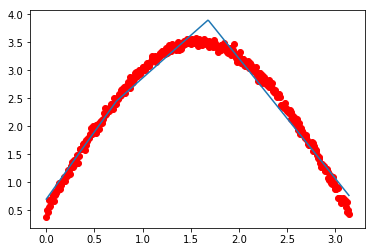

In [14]:
plt.scatter(x_data,y_data,c="r")
plt.plot(x_data,sess.run(layer2,feed_dict={xs:x_data,ys:y_data}))

In [15]:
pwd

'C:\\Users\\DELL\\testing and learning\\selfize'